# Project Name : Covid-19 twetter data analysis using deep learning methods
**Author:** **Nilufa Yeasmin**

In [1]:
#Importing all the necessary files
import pandas as pd
import re
import numpy as np
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
#Loading dataset
data=pd.read_csv('main_dataset.csv',index_col=0,encoding='latin1')

In [3]:
data.head()

user_id   screen_name  \
5    15872418.0    ABSCBNNews   
7   171548670.0   RadioNLNews   
9    23517017.0       953WDAE   
10  613510703.0      matanock   
11   38489678.0  JAMA_current   

                                                 text  
5   G20 agrees to debt relief for poorest countrie...  
7   B.C. health officials are urging people to kin...  
9   The Lovely Lisa Ann Joins The Show LIVE From N...  
10  @allisonnamias @ArriolaLR As @ethanbdm referen...  
11  Study suggests higher rates of co-infection be...

In [4]:
data.shape

(357526, 3)

## For the sentiment analysis i am gonna only work on the text data

In [5]:
#droping all columns except text column
df=data.drop(['user_id','screen_name'], axis = 1) 

In [6]:
df.head()

text
5   G20 agrees to debt relief for poorest countrie...
7   B.C. health officials are urging people to kin...
9   The Lovely Lisa Ann Joins The Show LIVE From N...
10  @allisonnamias @ArriolaLR As @ethanbdm referen...
11  Study suggests higher rates of co-infection be...

### Index is not in sequence(5-7) order so we need to reset the index

In [7]:
#reset the index
df.reset_index(inplace = True) 

In [8]:
df.drop(['index'],axis=1,inplace=True)

In [9]:
df.head()

text
0  G20 agrees to debt relief for poorest countrie...
1  B.C. health officials are urging people to kin...
2  The Lovely Lisa Ann Joins The Show LIVE From N...
3  @allisonnamias @ArriolaLR As @ethanbdm referen...
4  Study suggests higher rates of co-infection be...

In [10]:
df.shape

(357526, 1)

## It has around 357k rows .For quick analysis we will take first 100k rows

In [11]:
clean_data=df.iloc[:100000,:]

In [12]:
clean_data

text
0      G20 agrees to debt relief for poorest countrie...
1      B.C. health officials are urging people to kin...
2      The Lovely Lisa Ann Joins The Show LIVE From N...
3      @allisonnamias @ArriolaLR As @ethanbdm referen...
4      Study suggests higher rates of co-infection be...
...                                                  ...
99995  ð¨ Our @ICCS_updates position statement on #...
99996  Just a few days back, he was mocking reporters...
99997  @GovernorTomWolf \nCan we ask #Philadelphia @J...
99998  Some stats from last week about @BioExcelCoE #...
99999  Hong Kong consortium rolls out $126 home coron...

[100000 rows x 1 columns]

In [13]:
clean_data.shape

(100000, 1)

### Text cleaning

In [14]:
#Clean text
#function for cleaning text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    
    return text

clean_data['text']=clean_data['text'].apply(cleanText)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [15]:
clean_data

text
0      G20 agrees to debt relief for poorest countrie...
1      B.C. health officials are urging people to kin...
2      The Lovely Lisa Ann Joins The Show LIVE From N...
3        As  referenced, just saw this op-ed version ...
4      Study suggests higher rates of co-infection be...
...                                                  ...
99995  ð¨ Our _updates position statement on COVID1...
99996  Just a few days back, he was mocking reporters...
99997   \nCan we ask Philadelphia  and Pittsburgh  ha...
99998  Some stats from last week about  HADDOCK jobs ...
99999  Hong Kong consortium rolls out $126 home coron...

[100000 rows x 1 columns]

### Finding subjectivity and polarity

In [16]:
# Create a function to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

clean_data['Subjectivity']=clean_data['text'].apply(getSubjectivity)
clean_data['Polarity']=clean_data['text'].apply(getPolarity)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [17]:
clean_data.head(10)

text  Subjectivity  Polarity
0  G20 agrees to debt relief for poorest countrie...      0.000000  0.000000
1  B.C. health officials are urging people to kin...      0.900000  0.600000
2  The Lovely Lisa Ann Joins The Show LIVE From N...      0.625000  0.356534
3    As  referenced, just saw this op-ed version ...      0.000000  0.000000
4  Study suggests higher rates of co-infection be...      0.347222 -0.013889
5  Gabriel Leung and colleagues from Hong Kong de...      0.266667  0.125000
6  The _gov_au has provided SMSF trustees with a ...      0.237500 -0.012500
7  "It's too late for my dad. My dad's gone, and ...      0.300000 -0.150000
8  Belarusian President Lukashenka, fresh out of ...      0.575000  0.050000
9  We call on the Senate to move forward on a vot...      0.083333 -0.050000

In [19]:
!pip install wordcloud

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
from wordcloud import WordCloud

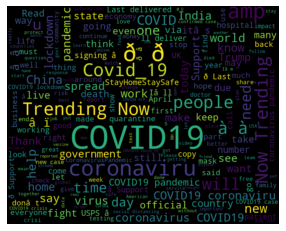

In [21]:
#Ploting Word cloud
allWords=''.join([twts for twts in clean_data['text']])
wordCloud=WordCloud(width=1000,height=800,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Finding Negetive , Neutral and Positive Sentiment 

In [22]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
clean_data['Analysis']=clean_data['Polarity'].apply(getAnalysis)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
clean_data.head()

text  Subjectivity  Polarity  \
0  G20 agrees to debt relief for poorest countrie...      0.000000  0.000000   
1  B.C. health officials are urging people to kin...      0.900000  0.600000   
2  The Lovely Lisa Ann Joins The Show LIVE From N...      0.625000  0.356534   
3    As  referenced, just saw this op-ed version ...      0.000000  0.000000   
4  Study suggests higher rates of co-infection be...      0.347222 -0.013889   

   Analysis  
0   Neutral  
1  Positive  
2  Positive  
3   Neutral  
4  Negative

In [24]:
# printing all positie tweets

j=1
sortedDF=clean_data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j) + '.' + sortedDF['text'][i])
        print()
        j=j+i

1.B.C. health officials are urging people to kind and not jump to conclusions about travellers amid the COVID19 pandemic. Shuswap kamloops  

2.The Lovely Lisa Ann Joins The Show LIVE From NYC!! -  

   

NFL MLB COVID19 Coronavirus 

LISTEN 


4.Gabriel Leung and colleagues from Hong Kong describe their actions after they were first alerted to a cluster of atypical pneumonia cases in Wuhan. A figure shows the evolution of the epidemic and the responses to date in Hong Kong. COVID19 SARSCoV2

9.Belarusian President Lukashenka, fresh out of a hockey game, to a reporter: "There are no viruses here. Did you see any of them flying around?" covid19 

Yet throughout April, the number of officially confirmed cases has roughly doubled every three days.  

17.Weâre all Al Tarazon this spring. âI just feel sad,â said the Oxnard High baseball coach. âI can't help it.â covid19 baseball
 via 

28.Today's COVID19 update discusses how to care for health care workers on the front lines of th


1450521.Hello Everyone! Follow My Twitter! For More Content!
media jfk news ConspiracyTheories crime Covid_19 history space universe journalism follow subscribe 

youtube MediaFreak

1453022.A bit of musictherapy away from covid19: Jazz at  free: Star-studded Jazz at Lincoln Center will stream during coronavirus pandemic  via  JazzLovers

1455525.Trump said the USA has already reached its peak - so why are the numbers of new cases today higher than yesterdayâs COVID19 ð¤ð¤ð¤

1458029. People need to remember every political that does this stuff. Only way to real change is to vote them out StayHome COVID19

1460539.COVID19 Respite facility off the ground- to help our provide a safe healing place during isolation and protecting the public health in New Haven - consider donation to  tribute to âCareer Respiteâ  

1463050.- Karnataka
Morning Bulletin
New - 17 Total - 277

- Haryana
Morning Bulletin
New - 6 Total - 204 (190+14)

India Total Cases - 11,636

KarnatakaFightsCorona

5218601. _Sailer Anyone else have a feeling patients are left to their own devices as scared &amp; under PPE supplied nurses avoid  contact w/COVID19 patients?  Who in their right mind would expose themselves to wards crammed full of sputte

5223314.As hospitals so important we stand shoulder to shoulder with developmental services, long-term care and other parts of health and social systems to keep all Ontarians especially our most vulnerable safe &amp; healthy wherever they live. InItTogether COVID19 

5228029.Awesome to be part of an outstanding panel ârepresented OT OccupationalTherapy &amp; our role in Mental health for all populations as well as those specific to the needs of asianamericans during this COVID19 pandemic. Thanks to all the organizers  

5232745.Really?! This kind of stupid actually exists?!ð CoronavirusPandemic PPE StupidPeople 

5237462.2 new cases in Barbados 

[0:32 GMT] coronavirus CoronaVirusUpdate COVID19 CoronavirusPandemic

5242181.Microsoft rolls out 

11242395.How many people have died on 5th Avenue?
COVID19 
CoronavirusPandemic

11249356.Who wins...                                              Money                                                      Or                                                               Coronavirus Safety ?

11256318.if it's true, ie multiple intelligence and media reports confirmed this story, this would be a game-changer in this pandemic COVID19

11263281.PhysicalDistancing doesnât mean we are alone. Stay connected virtually. 

Self-care us even more important while we StayAtHome StaySafeStayHealthy during Covid_19 

11270245.  teachers and healthcare workers need student debt forgiven. American workers making &lt;$50k need more than $1,200 to survive. When will these items be addressed?  Thank you. Stimuluscheck Covid_19 StudentDebtStimulus AmericanW

11277210.There is increasing confidence COVID19 likely originated in a Wuhan lab not as a bioweapon, but as part of China's effort to demonstrate tha

COVID19Ontario lockdown 

20227448. just published time line of events related to  and .

... with big omission. They did not mention when  created VTF
WHO bosses are one huge fiasco.  
COVID19

20236770. A Cuban medical brigade will arrive for the first time in Togo to support that nationÂ´s efforts vs COVID19. Cuba &amp; Africa share a historical friendship. ð¨ðº ð¹ð¬ SolidaridadMundial CubaSalvaVidas CubaEsSalud CubaPorLaSa

20246093.Join us tomorrow for Facebook Live at 10am, we've got our Motors division ready to show us some math! Bring your questions and participate in the comments!
.
.
COVIDKindness Math StayHomeStaySafe StayHomeStayConnected PrescottPD ThinBlueLine Motorcycles Prescott AZ 

20255417.BREAKING:  signs  the emergency order giving  ok to release hundreds of low level/vulnerable/inmates near early to protect from coronavirus &amp; create more social distancing room at state prisons  waleg 

20264744.CWT's teams in South America mobilize to help more than 20


32053488. National Security? It is Uyghurs laws to practice Genocide camps in HongKong 

When COVID19 came no one responded and laughed, a few months later all of us are regretting

Dont let this happen again

32065171.Check out our most recent YouTube video featuring staff member Charity Whitson and an inside look at her life during COVID19 as an EssentialWorker! ð·

Don't forget to like, subscribe and WashYourHands 



32076856.Coronavirus Thanks again CCP and your enabler WHO for all of this.

32088543. _DurhamPT I frequented  hot bar almost daily but not during CoronavirusOutbreak besides the lines to even get into the grocery are long as heck.

32100231.Meet my teammate Kayla Epstein, PA-C, Cerebrovascular physicianassistant 
Covid_19 puts patients at a higher risk of blood clots and stroke.  
Learn the signs of stroke now! befast stroke neurosurgery CVAâ¦ 

32111921. So what did you do? Did you warn your constituents? 
Did you share your concerns to Americans who elected you 

45765115.  Is it not because the Press is always kind to him?
Unlike the other alternative, with Jay softballs are the norm rather than a room full of pit dogs ready to attack raw meat.
It's all about the ambience of the room you are in.
COV

45779064.And she let us in on her intention too... to be the first country to achieve total COVID19 elimination. She just loves that "First in the World" glory. " Hard and Early" 

45793024.Launching the COVID-19 Risk Analysis Test. Watch this video to know more. Click here to take the test: 

Coronavirus COVID19  Lockdown SelfAssessment Chatbot DocsAppHaiNa DocsApp Covid19India 

45806985.Elizabeth  has a plan, a really good plan, to kick this Covid_19 in the butt.  Rachel  tonight. 

45820951.This WellnessWednesday we want to remind  you  is available with resources to help youth cope during COVID19 &amp;  has free webinars for adults here:   Follow our Be Well page at:  

45834919.It will be really interesting in two weeks to see how many COVID

 Coronavirus: World surpasses two million confirmed cases Coronavirus 

64190234.With people hunkering down it's that more important to get your meals planned &amp; have your ingredients go the distance. Here are some amazing ingredients to stock your pantry with! 30Seconds  coronavirus socialdistancing food COVID19 

64206828.Happy nationaltakeoutday! What local munchies are you ordering tonight?? 
yyc calgary yycbased supportlocal localbusiness cannabis cannabiscommunity letssmoke edibles CBD covid_19 socialdistancing THC CTCKW 

64223426.Important to read. Stay home please. Covid_19 TESTING 

64240025.Everything about wearing masks, gloves, social distancing and stay at home orders are all anti-human (not natural).

The man made (non natural) virus is working way better than planned.

Smh Wake Up Dummies

CoronaVirusUpdate 
Covid_19

64256626.ð¨ð¨Over 2 Million COVID-19 confirmed cases worldwideð¨ð¨ 

Confirmed COVID-19 Cases: 
637,716 K ðºð¸
2,060,927 M ð

COVID-19 F

84803534.Sentinel Diagnostics has developed a ready-to-use Real-Time PCR mix for the detection of novel Coronavirus disease -  : Covid19 

84822645.Just in! Quick Chocolate Chip Cookies with Cannabutter cannabis cannabiscommunity edibles COVID19 stayhome coronavirus easter2020 

84841758.EggChallenge

Wow, Ali proves the theory correct!

HardworkDedication VictoryMMA Quarantine SocialDistancing SupportDog COVID19 BFF AmericanBully MansBestFriend SupportDog 

***Checkout Victory MMA.â¦ 

84860872.Watching _FXonHulu with my POL colleagues was really fun. I didn't think about COVID19 or all the grading I have to do, the research I'm behind on, and prepping for homeschool tomorrow. Longest stretch I've taken for myself since this whole thing began. Thx, _Wolbrech

84879987. It's always been fairly clear that 's grasp of Science is at best 'loose'...
Maybe someone from the conservative side of auspol could explain to doctors how HerdImmunity works in an unvaccinated population, where the d


111625896.IndianArmy personnel posted in Pune contributed from their pockets to give ration to 800 migrantlabourers who are working at the new command hospital here. Many workers said their lives was saved by them in this Covid_19 crisis time    

111647868.Found this mask in one of our old MedKits, it's not N95 approved, but it'll work a whole lot better than my scarf when it's 80+ outside and I have to go to the store lol. Covid_19 

111669841.Now more than ever, we need to LeanOn each other for support. Resources for Women During the Coronavirus Pandemic - â¦â© 
 

111691815.United States records nearly 2,600 coronavirus deaths in 24 hours - a new record and the heaviest daily toll of any country, Johns Hopkins University reports: AFP news agency

111713791.Phone charger donations helping covid19 patients be with loved ones. ð± â¤ï¸ San Diego Family Fundraising for Phone Chargers so COVID-19 Patients Donât Suffer Alone  

111735770.NEW: A third screener at SWFL Int'l Airpor

142255438.Psychics: "You should've never went to see a psychic, it is divination. It is the devil. They are heretics, and practice witchcraft. It's completely unsanctioned from the Church." thesopranos fromwheretoeternity coronavirus covid19 necromancy leviticus20 deuteronomy18 

142280362.COVID19 business interruption claims should be paid. Free consultations  MAGA 

142305289. _policy April 15 - Brave locals of the impoverished Falakedin district in Khorramabad, western Iran, clashed with hundreds of anti-riot units &amp; IRGC Basij members who launched an attack targeting their homes.CoronaVirus 
IranProt

142330225.Love you Deki Eri, stay safe! ðâ¤ï¸ððERi-TV music:  á¨á­áá°á£á£á - A new song about staying healthy and safe during COVID19  via 

142355162.IMF says the coronavirus pandemic is likely to bring Asia's economic growth to a a standstill for the first time in 60 years.

142380100.Tomorrow, will provide FREE meals for all uniformed first responders at  Te



167188376.The announcement shows how the economic downturn triggered by the coronavirus response is even affecting some of the richest tech businesses.

Google jobs 

167215388.Check out our dedicated website for COVID-19 
which was built with love by  for India 
COVID19 CoronaUpdatesInIndia
Covid19India
India StayHomeStaySafe
IndiaFightsCorona StayHomeSaveLives StayHome 

167242401.If you love dogs, as well as cute AND funny British men, heâs a great follow on Twitter. Definitely a good distraction from the daily near-death experience of just going outside. Covid_19 StayHome dogsofquarantine dogsduringlockdown 

167269416._daven2   The cases are real in Connecticut the death ð toll is overwhelming  Corona virusâs has no names itâs effective bigotry in USA justice system is corrupted politics laws and bigotry abuse of power from the begin

167296432. The virus that will linger much longer than Covid_19

167323449.Maybe time to talk with your white supremacist relative ... ju



201684058. Nice piece  You raised the point about temperature/summer effect on COVID19 spread. The simple answer is: see Australia, Brazil, etc. There are many factors but IMHO the critical one remains restrictions to control of the spread

201713709.Healthcare and Frontline Workers fighting Corvid19 CoronaVirus, we are still fighting with you. 4-5 weeks in, and easily one of THE busiest streets in Downtown Miami in the peak High Season. Hereâs how it looks tonight. Absolutely silent! Keep...pushing...forward!! 

201743364.It's interesting to analyze that Covid19 is seriously affecting financial hubs of most nations like 
New York in US, 
Mumbai,Delhi in India,
London in UK

Countrywise US and EU widely affected

Covid19
CoronavirusLockdown
CoronavirusOutbreak
Coronavirusdata
StayHome

201773025.Attention all wildcats! Dont forget to tune in to this epic reunion! highschoolmusical thedisneyfamilysingalong nostalgia disney abc news television music COVID19 coronavirus SocialDistanci

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





521904382.Adult education and training will help to get economy back on track when COVID19 lockdown is over... TripleETraining  

521951514.          also our unsung heroes during COVID19 our very own cooperatives  let us also salute them as our 'soldi

521998648.Woman tests COVID-19 positive, committed suicide by hanging her self

COVID19
coronavirus


522045784.Thirty-four new cases of COVID19 have been reported as follows:

18 Lagos
12 in Kano
2 in Katsina
1 in Delta
1 in Niger

As at 11:20 pm 15th April there are 407 confirmed cases of COVID19 reported in Nigeria. 128 have been discharged with 12 deaths

TakeResponsibility 

522092921. interesting article  !
Please take a look at this one too


happy to get your feedback!
innovation QuarantineLife COVID19 StayAtHome StayHomeSaveLives StayHome

522140061.Finally Some Good News
They recoverd from covid-19
Covid_19 juvetus
Forzajuve

 

522187207.US Redneck Army in Michigan demands the right follow their leader and to die of ignoran

578811984. âWe also have our own family bereavement to contend with, it makes everything so real."

Funeral director Daniel Devall, whose uncle died after contracting COVID19, said his staff are attending an increase in deaths in the community.

COVID19 rdguk

578861542.The Afghan government has released 253 more prisoners from Kabulâs Pul-e Charkhi prison as part of the administrationâs efforts to reduce chances of a COVID19  outbreak

578911103."Coronavirus: World surpasses two million confirmed cases" Coronavirus 

578960667.  This conclusion from the HK research paper is important to the recommendations for TestTraceIsolate measures. 

579010232.We need to be HealthyAtHome not just for our physical wellbeing but also for our mentalhealth. Here are our tips on staying mentally healthy during COVID19.
WeAreAfrica
 

579059798.First clinical application of plasma therapy for Covid_19 in India*

579109366.I think its better to cook food at home than to risk life from a delivery b

636502595.Definitely. Most people have came together to fight Covid_19 If we can all continue to share resources and fight poverty we can have a better world for all. 

636554404.Excellent dashboard from  with OFFICIAL data that allows us to follow up and understand better the corona virus pandemic who spain europe coronavirus COVID19  

636606215.A social gathering or any cultural or sports events immediately after the lockdown ends or International flights or any other mass gathering shall be restricted. 

Lockdown Lockdown2020 COVID19 COVID_19 Corona CoronaVirus SocialDistancing InternationalFlights Travel 

636658030.Really proud of my team for being so keen to contribute to the COVID-19 project that my colleagues   and I got funding for based on newly identified compounds and my groupâs previous work ( Two of them start in the lab today. coronavirus

636709848.Chancellor leads on G20 Finance Ministersâ Action Plan to fight Covid-19 global outbreak  via   coronavirus G20Summit 

COVID19 

682853133.A tweet by the stateâs Ministry for Health via its official Twitter handle: , read: âWednesday, 15th April 2020. As at 11:55 pm, 1 death of COVID19 has been recorded in .â
Read more: 

682912788.   It only took 12 days for the COVID19 cases to double from 1 million to 2 million!  Worldwide Confirmed Coronavirus Cases Top 2 Million 

682972448.yesterday new corona cases across the globe
Europe :33469
NorthAmerica : 32565
Asia : 11846
SouthAmerica : 5613
Africa : 955
oceania : 67
Total : 84515

COVID19  BeSafe CoronavirusLockdown coronavirusindia epidemic

683032109.Double Wahala: 72 families have been quarantined in Delhi after a pizza delivery driver tested positive for Covid19.

683091772.Handwashing is still the best way to prevent the spread of COVID-19, and we must make sure our unhoused neighbors have access to the resources to put this recommendation into practice.

MedTwitter COVID19

683151437.âThis virus knows no borders. Tackling it therefore requi

757926130.pizza Covid_19 coronavirus 

those ordering pizza and putting them self and family members at risk ans society at large, pls be aware there is on pizza in heaven, so be ready for hell.

757988228.As the world wages war against CoronaVirus, I chanced upon this timeless classic that finds application to this day in political strategy, business design &amp; even ridding bad habits or embracing good ones. ArtofWar SunTzu 

758050328. Germany has reported 133,456 confirmed Covid_19-19 cases and 3,592 deaths, based on data compiled by Johns Hopkins University. coronavirus

 

758112429.Look at how the new UKaid funding of Â£2ï¸â£0ï¸â£0ï¸â£ million is being broken down in the fight against CoronaVirus ð°

Read more: 

This sum brings the total UK aid up to Â£7ï¸â£4ï¸â£4ï¸â£ million, making the UK one of the biggest donors to the InternationalResponse ð¬ð§ 

758174532.â STAY INSIDE â STAY HAPPY â
. 
. 
. 
. 
CoronaWillEndSoon coronavirus coronavirus StayAtHome

828165047.Trump ready to provide Russia with ventilators to fight COVID19 

828229319.Thanks to the  for reaching out to all those who need our help during the CoronavirusOutbreak . 
Kudos to the entire team _101 _Kataruka .     

828293592.à¤à¤à¤âà¤¡à¤­à¤¾à¤°à¤¤ | if it's true, whole world appreciate    à¤à¥ on handling the  CoronavirusPandemic compare to the most of countries via . But urban_naxlas  designer_reporters     not accept that ð¤ 

828357867.Vincent is most of us.
Unemployed and self isolating.

FFVIIRemake vincentvalentine COVID19 CCPVirus coronavirus FFVIIR 

828422143.People always want to say you look like someone 

lol lmao blacktwitter funny tiiktok coronavirus  rasheeda BailoutHumans nyc atlanta haitian blackpeoplebelike blackpeople houston losangeles COVID19 

828486421.Special appreciation to all medical personnel fighting covid 19 around the world

Covid_19 covid
Kano Lagos 

828550702.Most dumb student of the class with 0 marks trying to find flaws in t

914492323. many more of the same sad stories and more are also easily available. Everyone has an agenda whether its in plain sight or not. COVID19 Covid_19 Quarantine

914559279.Why do most Indian stand-up comedians make jokes only on Hindu religion?

Moradabad covidindia CoronaFighters COVIDIOTS IndiaFightsCorona Covid_19 KejriwalExposed StayHomeSaveLives lockdown Lockdown2 COVID Modi ArrestFaruquiMunawar MunawarFaruqui IndiaFightsCOVID19

914626238.   fantastic questions this is what the public want Covid_19 we werenât prepared why wonât  just admit it

914693198.A series of children's educational books produced here on the Coast are now available for free. The Griffith University professor who developed them wants to help families whose homes have turned into classrooms.   coronavirus 7NEWS 

914760159. This makes Labour look like theyâre more concerned about the economy.  The low paid are most likely to be still working or made to work in unsafe conditions, how does this help


987872425.Hopfully ! COVID19 reminds us that the contribution of a person in the economy is beyond its own wage. Interactions are fundamental to the functioning of our economies. Everyone's work is important ! 

987941549.As we globally continue making adjustments to our way of life amidst Covid_19 outbreak, read  thought-provoking article on the potential of social bonds to help mitigate this crisis &amp; adapt to future crises  Beyond2020 sustainablefinance

988010674.STAY HOME STAY SAFE
LET'S BREAK THE CORONA CHAIN

digitalmarketing branding business onlinemarketing contentmarketing socialmedia rajahmundry corona covid19 

988079802.'Last month, the RoyalCommission into Violence, Abuse, Neglect and Exploitation of People with Disability said people with disability felt ignored in the government and community responses to the coronavirus pandemic gripping the globe' 

988148939.COVID19 lockdown measures have significantly changed the way we move. Based on data from  we created a new

1075546576.D-3 before the MBRUHacksCOVID19 UAE residents and nationals this is for you :-)  COVID19 healthdesign DesignLab  WeAreInThisTogether 

1075618230.OneMillionClaps is on ITV all day! Amazing that this campaign with  keeps growing. Check it out and support our incredible NHS ThankYouNHS COVID19 

1075689885.Delhi pizza delivery boy tests positive for Covid-19, 72 families, 17 other delivery boys quarantined
Its request guys please ignore such a these kind of facilities 
india 
economicgrowth 
covid_19in
coronavirusindia  
america 
covid19 
coronavirus 
economicslowdown
modi 

1075761541.ThursdayThoughts Jamaat E Islami Hind Greater Hyderabad
Doing A Great Job.ðð»ðð»ðð»



COVID19 

1075833198.Amid COVID19, we must not forget ongoing HumanitarianCrises

In Ethiopia, more than 7Mð¥require HumanitarianAssistance

Funding for their support cannot be diverted, especially during the pandemic

InvestInHumanity LeaveNoOneBehind

    

1075904856.Doneer aan  via zijn ac

coronavirus SARSCoV2

1165714515.Thinking of becoming a mentor or looking for a mentor? Don't miss this important Nursing World Shared Practice Forum on 21 April.  Mentorship is crucial for nurses &amp; as COVID19 has shown you can never have enough nurses.  PedsICU PEM 

1165788662.New Zealand Could Form Border âBubbleâ With Australia vasc auspol coronavirus 

1165862811.The FaroeIslands will partially reopen on 20. April. Daycare, schools &amp; more will open. 

9. May sport events will begin, but without spectators.

Today: 

10 days in a row with no new COVID19 case.

92% of the 184 who had coronavirus have now recoveredð

Farpol EUpol WHO 

1165936962.Fixed that for you, : Cops free alleged child rapist, 75, citing COVID19, reconciliation with victim

Sheesh.



1166011115.During these challenging times, take a look at the COVID19 key advice page on the  website. There is a host of information available which may be of interest to you and your business.

View the page here:


1249176207.Pleased to announce that today the  launches our series of Ethics in the News
podcasts - exploring conversations at the intersection of ethics and media. Todayâs conversation is about COVID19, pressfreedom.
Please follow _podcast for more

1249252459. Ms Merkel is trained in science &amp; it's that understanding &amp; knowledge that's driven her decision making. Where as we get the "Let me be clear" "We're working night &amp; day" "We're ramping up" spin &amp; avoidance of answers this is

1249328712.BREAKING: 10 people died from coronavirus and 341 tested positive in the last 24 hours in Bangladesh. Total death toll jumps to 60, and covid19 cases to 1,572: IEDCR.

1249404966.Round two. 

Let us never forget the seriousness of this virus and our fragility as a people. May we get through this by doing what is right and what is needed. 

StayHome COVID19 

1249481221.9 more COVID19 cases reported in Haryana today (8 in Panchkula &amp; 1 in Palwal). Total number of coronavir

1347883714.83 recoveries now in Ghana. This too shall surely pass we and shall win but for now StayHomeStaySafe 

1347962443.Johnson wanted to avoid a massive rescue package that would offend its âfree marketâ principles. It was only after advisers warned that he could be responsible for a 1/4 of a million deaths that Johnson acted more aggressively against COVID19.

Tories put money before people.

1348041173.Half of prisons in England and Wales have confirmed cases of COVID19. Where are the 15,000 releases needed to social distance in prison? Release2SaveLives   

1348119904.COVID19 date confusion strikes again. A whole week early for my universal credit appointment. To be fair it said Thursday, so Iâm taking a win for getting the right day, if not date. Who knows what I can achieve today!?

1348198640.COVID-19: Commercial Landlords &amp; Tenants FAQs | We've been approached by a number of commercial landlords &amp; tenants requesting legal advice during the coronavirus pandemi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





2199764852.India sends HCQ to 100+ counties to fight against COVID-19. Proud and Compassionate Indians... "Sab Kuch Yaad Rakha Jayega" Corona COVID19 Covid_19 CoronaWillEndSoon coronavirus coronapocolypse pmoindia RepublicTV

2199862493.A powerful picture of living with disability, and of the realities for carers, in the time of COVID19 by Surabayaja Kumar  


2199960138.Read our latest article, thanks  

landlords Covid_19 propertymanagement 

2200057784.Ameyo offers a selfassessmentIVR solution to Governments and HealthCareProviders to help citizens self assess COVID19 symptoms with simple missed call based IVR solution.  

covidtracking coronavirus pandemic India Africa ME APAC LetsFightCorona 

2200155431.We will continue to take our place at the forefront of the worldâs fight against Covid-19 with the new drugs, we are developing. COVID19 polifarmailac polifarmapharmaceuticals 1stchoiceinparenterals svp parenterals hospitaldrugs propofol rocuronium 

2200253081.  Good reportin

2312022725.Maldives Health authorities allocate a special code to recognize positive patients &amp; uses that code when referring to them in the communications they do thereafter. 
Considering certain incidents that occurred in LKA, I truly like this method ðð COVID19  LKA Maldives  HPA

2312122500.  _Europe         Madam/ Sir, if you donât mind, please attend our Twitter course for learning how to remove Tedros from WHO! I am sure that we are much pr

2312222276.The inability to accept youâre part of a major historical event has a face now
thursdaymorning COVID19 

2312322054.I do not know about you but I will do anything to get out of my home right now.
Once upon a time, I craved some alone time, I craved family time, I just wanted to...
Read more on "Staying at home (COVID-19 updates)"

LockDownDiary 
COVID19 

2312421833.Tackling COVID19 should be context-specific. â© and I argue that many African governments do not have to take the path leading to a lockdown like the US

## Ploting Polarity vs Subjectivity
 

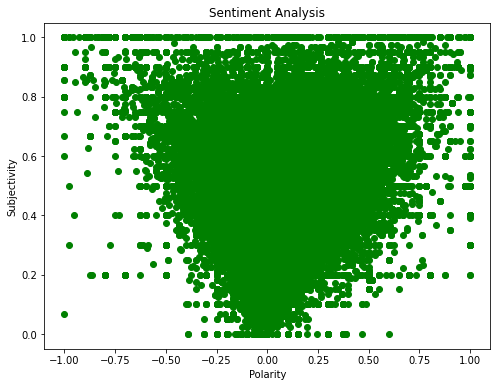

In [25]:
plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(clean_data['Polarity'],clean_data['Subjectivity'],color='Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Count positive,negative and Neutral 

In [26]:
# value counts
clean_data['Analysis'].value_counts()

Positive    45739
Neutral     36460
Negative    17801
Name: Analysis, dtype: int64

## Ploting the Positive ,negative and neutral sentiment
 

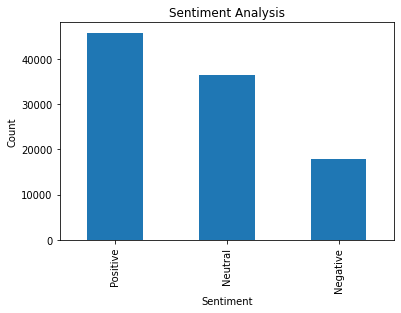

In [27]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
clean_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

## Add lebel of the data set 

In [28]:
# Creat the function to get label of the dataset
def getLabel(Analysis):
    if Analysis== 'Negative':
        return -1
    elif Analysis == 'Positive':
        return 1
    else:
        return 0
clean_data['Label']=clean_data['Analysis'].apply(getLabel)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
clean_data.tail()

text  Subjectivity  \
99995  ð¨ Our _updates position statement on COVID1...      0.000000   
99996  Just a few days back, he was mocking reporters...      0.050000   
99997   \nCan we ask Philadelphia  and Pittsburgh  ha...      0.100000   
99998  Some stats from last week about  HADDOCK jobs ...      0.379167   
99999  Hong Kong consortium rolls out $126 home coron...      0.000000   

       Polarity  Analysis  Label  
99995  0.000000   Neutral      0  
99996 -0.100000  Negative     -1  
99997 -0.100000  Negative     -1  
99998  0.278125  Positive      1  
99999  0.000000   Neutral      0

In [30]:
#This part is to just see the columns of the dataset:
clean_data.columns

Index(['text', 'Subjectivity', 'Polarity', 'Analysis', 'Label'], dtype='object')

In [31]:
#Here I am making my X value which will then be fitted to scikit learning training test split model
X= clean_data['text'].values
X.shape

(100000,)

In [32]:
y= clean_data['Label'].values
y.shape

(100000,)

## Spliting the dataset into training and testing set

In [33]:
# spliting the dataset into train and test
#from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Importing all necessary files 

In [34]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

## Preparing the Embedding Layer 

In [35]:
# we will use the 'Tokenizer' class from the 'keras.preprocessing.text' module to create a word-to-index dictionary.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

## We will use GloVe embeddings to create our feature matrix

In [39]:
# from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('E:\project for paper\dataset\glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [40]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Text Classification with Simple Neural Network 

In [41]:
#Defining simple Neural network
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#print the summary of our model:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          30035400  
_________________________________________________________________
flatten (Flatten)            (None, 150000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 150001    
Total params: 30,185,401
Trainable params: 150,001
Non-trainable params: 30,035,400
_________________________________________________________________
None


In [43]:
#Let's now train our model:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
500/500 [==============================] - 30s 58ms/step - loss: 0.4825 - acc: 0.4388 - val_loss: 0.2858 - val_acc: 0.5061
Epoch 2/6
500/500 [==============================] - 29s 57ms/step - loss: 0.1817 - acc: 0.5247 - val_loss: 0.2015 - val_acc: 0.5290
Epoch 3/6
500/500 [==============================] - 29s 58ms/step - loss: 0.0112 - acc: 0.5421 - val_loss: 0.1379 - val_acc: 0.5263
Epoch 4/6
500/500 [==============================] - 29s 58ms/step - loss: -0.0693 - acc: 0.5513 - val_loss: 0.0902 - val_acc: 0.5126
Epoch 5/6
500/500 [==============================] - 29s 58ms/step - loss: -0.2378 - acc: 0.5473 - val_loss: 0.0530 - val_acc: 0.5185
Epoch 6/6
500/500 [==============================] - 29s 58ms/step - loss: -0.2698 - acc: 0.5569 - val_loss: 0.0219 - val_acc: 0.5203


In [44]:
#To evaluate the performance of the model:
score = model.evaluate(X_test, y_test, verbose=1)

625/625 [==============================] - 7s 12ms/step - loss: 0.0501 - acc: 0.5207


In [45]:
#check the test accuracy and loss:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.05008700489997864
Test Accuracy: 0.5206500291824341


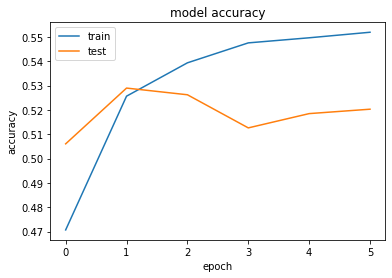

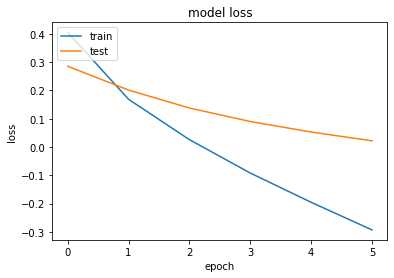

In [46]:
 #plot the loss and accuracy differences for training and test sets

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
       
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Text Classification with a Convolutional Neural Network

In [47]:
#Defining CNN model
model = Sequential()

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [48]:
#print the summary of the model:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          30035400  
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          192128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 30,227,657
Trainable params: 192,257
Non-trainable params: 30,035,400
_________________________________________________________________
None


In [49]:
#To fit the model and evaluate it on the training set: 
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
500/500 [==============================] - 268s 536ms/step - loss: 0.1452 - acc: 0.4965 - val_loss: -2.0200 - val_acc: 0.5965
Epoch 2/6
500/500 [==============================] - 289s 577ms/step - loss: -4.3404 - acc: 0.5803 - val_loss: -12.7595 - val_acc: 0.5964
Epoch 3/6
500/500 [==============================] - 305s 610ms/step - loss: -18.3039 - acc: 0.5937 - val_loss: -34.3080 - val_acc: 0.5931
Epoch 4/6
500/500 [==============================] - 272s 544ms/step - loss: -42.1471 - acc: 0.5997 - val_loss: -64.9448 - val_acc: 0.5884
Epoch 5/6
500/500 [==============================] - 281s 561ms/step - loss: -78.3587 - acc: 0.6009 - val_loss: -104.1900 - val_acc: 0.5898
Epoch 6/6
625/625 [==============================] - 21s 34ms/step - loss: -140.3535 - acc: 0.5884


In [50]:
#To check the test accuracy and loss of the model:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -140.35353088378906
Test Accuracy: 0.5884000062942505


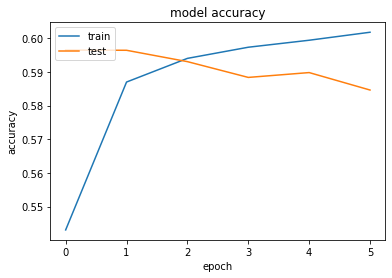

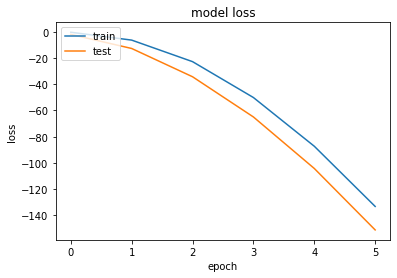

In [51]:
#plot the loss and accuracy of the model:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Text Classification with Recurrent Neural Network(RNN)/Long Short Term Memory network(LSTM) 

In [52]:
#Defining LTSM model:
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [53]:
#Print the summary of the model:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 300)          30035400  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 30,255,177
Trainable params: 219,777
Non-trainable params: 30,035,400
_________________________________________________________________
None


In [54]:
##To fit the model and evaluate it on the training set: 
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
500/500 [==============================] - 662s 1s/step - loss: 0.6064 - acc: 0.3655 - val_loss: 0.5810 - val_acc: 0.3681
Epoch 2/6
500/500 [==============================] - 652s 1s/step - loss: 0.5973 - acc: 0.3614 - val_loss: 0.5808 - val_acc: 0.3681
Epoch 3/6
500/500 [==============================] - 636s 1s/step - loss: 0.5981 - acc: 0.3612 - val_loss: 0.5817 - val_acc: 0.3681
Epoch 4/6
500/500 [==============================] - 634s 1s/step - loss: 0.5988 - acc: 0.3638 - val_loss: 0.5826 - val_acc: 0.3681
Epoch 5/6
500/500 [==============================] - 632s 1s/step - loss: 0.5969 - acc: 0.3583 - val_loss: 0.5820 - val_acc: 0.3681
Epoch 6/6
625/625 [==============================] - 82s 131ms/step - loss: 0.5950 - acc: 0.3672


In [55]:
#To check the test accuracy and loss of the model:
print("Test Score:", score[0]) 
print("Test Accuracy:", score[1])


Test Score: 0.5949536561965942
Test Accuracy: 0.367249995470047


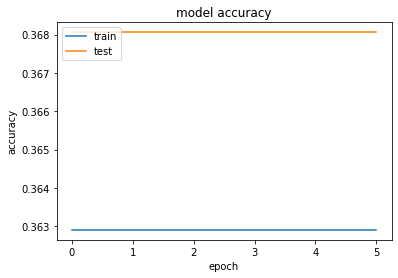

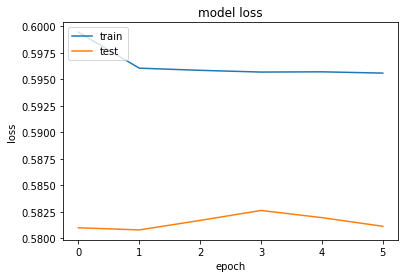

In [56]:
#plot the loss and accuracy of the model:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()